<a href="https://colab.research.google.com/github/Keerthibalraj/Digital-signal-processing/blob/main/Signal_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

"""Generate signals
"""
import numpy as np
import matplotlib.pyplot as plt


def generate_signal(length_seconds, sampling_rate, frequencies, func="sin", add_noise=0, plot=False, include_amplitude=False, normalize=False):
    r"""
    Generate a n-D array, `length_seconds` seconds signal at `sampling_rate` sampling rate.

    Args:
        length_seconds : float
            Duration of signal in seconds (i.e. `10` for a 10-seconds signal, `3.5` for a 3.5-seconds signal)
        sampling_rate : int
            The sampling rate of the signal.
        frequencies : 1 or 2 dimension python list a floats
            An array of floats, where each float is the desired frequencies to generate (i.e. [5, 12, 15] to generate a signal containing a 5-Hz, 12-Hz and 15-Hz)
            2 dimension python list, i.e. [[5, 12, 15],[1]], to generate a signal with 2 channels, where the second channel containing 1-Hz signal
        func : string, optional, default: sin
            The periodic function to generate signal, either `sin` or `cos`
        add_noise : float, optional, default: 0
            Add random noise to the signal, where `0` has no noise
        plot : boolean, optional, default: False
            Plot the generated signal
        include_amplitude : boolean, optional, default: False
            Amplitude for each frequency is included in the `frequencies` param. See Usage.
        normalize : boolean, optional, default: False
            Normalize signal between 0 to 1
    Returns:
        signal : n-d ndarray
            Generated signal, a numpy array of length `sampling_rate*length_seconds`
    Usage:
        >>> # 1 channel, contains 2hz
        >>> s = generate_signal(
        >>>     length_seconds=4,
        >>>     sampling_rate=100,
        >>>     frequencies=[2],
        >>>     plot=True
        >>> )
        >>>
        >>> # 1 channel, 2 frequencies, 1hz and 2hz, with noise
        >>> s = generate_signal(
        >>>     length_seconds=4,
        >>>     sampling_rate=100,
        >>>     frequencies=[1,2],
        >>>     func="cos",
        >>>     add_noise=0.5,
        >>>     plot=True
        >>> )
        >>>
        >>> # 3 channels
        >>> s = generate_signal(
        >>>     length_seconds=3.5,
        >>>     sampling_rate=100,
        >>>     frequencies=[[1,2],[1],[2]],
        >>>     plot=True
        >>> )
        >>>
        >>> # single channel containing 1hz and 2hz frequencies, where 1hz's amplitude is 1, and 2hz's amplitude is 4
        >>> s = generate_signal(
        >>>     length_seconds=3.5,
        >>>     sampling_rate=100,
        >>>     frequencies=[[6,1],[2,4]],
        >>>     plot=True,
        >>>     include_amplitude=True,
        >>> )
        >>>
        >>> # 2-dim channels. First channel contains 1hz (1 amplitude), and 2hz (4 amplitude). Second channel contains 4hz (10 amplitude), 8hz (1 amplitude) and 10hz (4 amplitude).
        >>> s = generate_signal(
        >>>     length_seconds=3.5,
        >>>     sampling_rate=100,
        >>>     frequencies=[ [[1,1],[2,4]], [[4,10],[8,1],[10,4]] ],
        >>>     plot=True,
        >>>     include_amplitude=True,
        >>> )
    """

    frequencies = np.array(frequencies, dtype=object)
    assert len(frequencies.shape) == 1 or len(frequencies.shape) == 2 or len(frequencies.shape) == 3, "frequencies must be 1d, 2d ore 3d python list"

    expanded = False
    if isinstance(frequencies[0], int):
        frequencies = np.expand_dims(frequencies, axis=0)
        expanded = True

    if not include_amplitude:
        frequencies = np.expand_dims(frequencies, axis=-1)

    if len(frequencies.shape) == 2 and include_amplitude:
        frequencies = np.expand_dims(frequencies, axis=0)
        expanded = True

    sampling_rate = int(sampling_rate)
    npnts = int(sampling_rate*length_seconds)  # number of time samples
    time = np.arange(0, npnts)/sampling_rate
    signal = np.zeros((frequencies.shape[0],npnts))

    for channel in range(0,frequencies.shape[0]):
        for this_freq in frequencies[channel]:

            freq_signal = None

            if func == "cos":
                freq_signal = np.cos(2*np.pi*this_freq[0]*time)
            else:
                freq_signal = np.sin(2*np.pi*this_freq[0]*time)

            if include_amplitude:
                freq_signal = freq_signal * this_freq[1]

            signal[channel] = signal[channel] + freq_signal

        if normalize:
            # normalize
            max = np.repeat(signal[channel].max()[np.newaxis], npnts)
            min = np.repeat(signal[channel].min()[np.newaxis], npnts)
            signal[channel] = (2*(signal[channel]-min)/(max-min))-1

    if add_noise:
        noise = np.random.uniform(low=0, high=add_noise, size=(frequencies.shape[0],npnts))
        signal = signal + noise

    if plot:
        plt.plot(time, signal.T)
        plt.title('Signal with sampling rate of '+str(sampling_rate)+', lasting '+str(length_seconds)+'-seconds')
        plt.xlabel('Time (sec.)')
        plt.ylabel('Amplitude')
        plt.show()

    if expanded:
        signal = signal[0]

    return signal





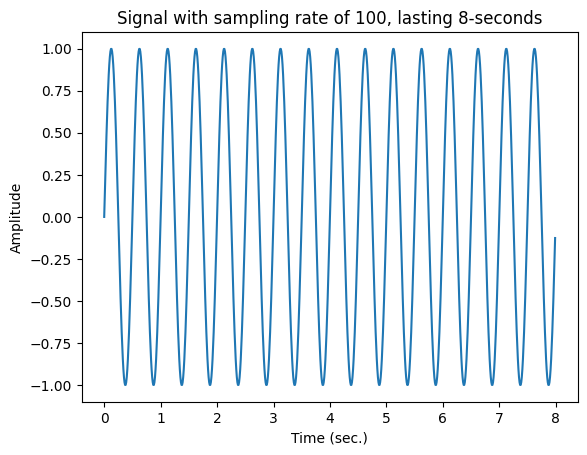

In [9]:

# 1 channel, contains 2hz
s = generate_signal(
    length_seconds=8,
    sampling_rate=100,
    frequencies=[2],
    plot=True
)


GENERATE SIGNAL

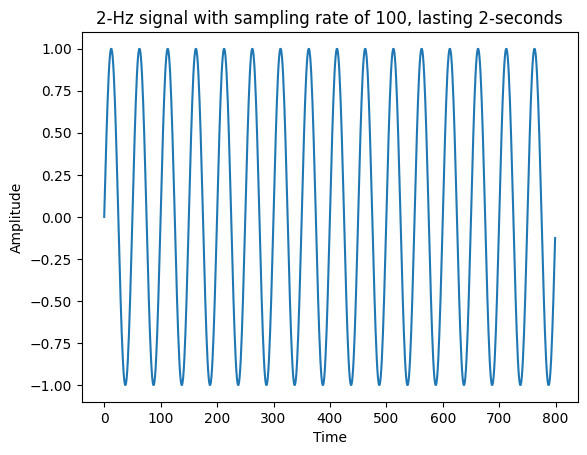

In [10]:
sampling_rate = 100
length_seconds = 8
frequency = 2
npnts = sampling_rate*length_seconds # number of time samples
time = np.arange(0, npnts)/sampling_rate # the `x` in time for each time step to produce the wave
s = np.sin(2*np.pi*frequency*time)
plt.title('2-Hz signal with sampling rate of 100, lasting 2-seconds')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(s)
plt.show()

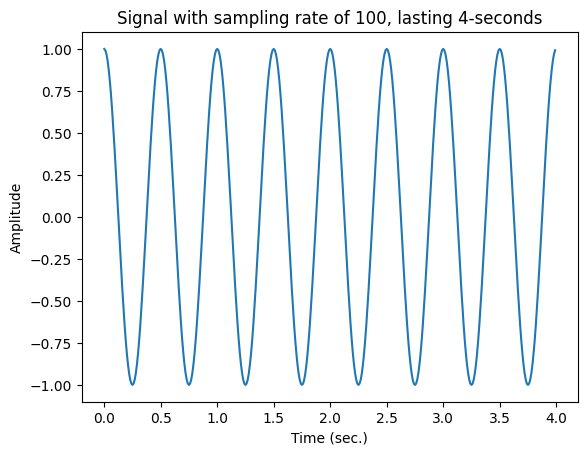

In [12]:
# 1 channel, 2 frequencies, 1hz and 2hz
s = generate_signal(
    length_seconds=4,
    sampling_rate=100,
    frequencies=[2],
    func="cos",
    # add_noise=0.5,
    plot=True
)

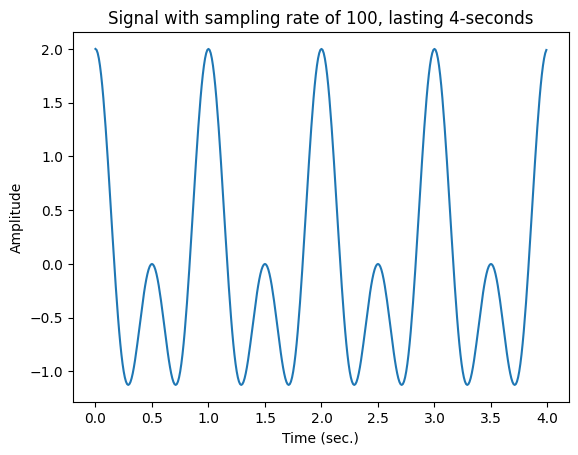

In [14]:
# 1 channel, 2 frequencies, 1hz and 2hz
s = generate_signal(
    length_seconds=4,
    sampling_rate=100,
    frequencies=[1, 2],
    func="cos",
    # add_noise=0.5,
    plot=True
)

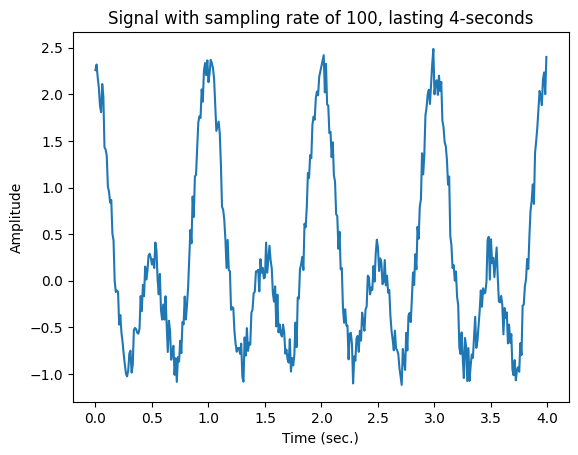

In [15]:
# 1 channel, 2 frequencies, 1hz and 2hz
s = generate_signal(
    length_seconds=4,
    sampling_rate=100,
    frequencies=[1, 2],
    func="cos",
    add_noise=0.5,
    plot=True
)

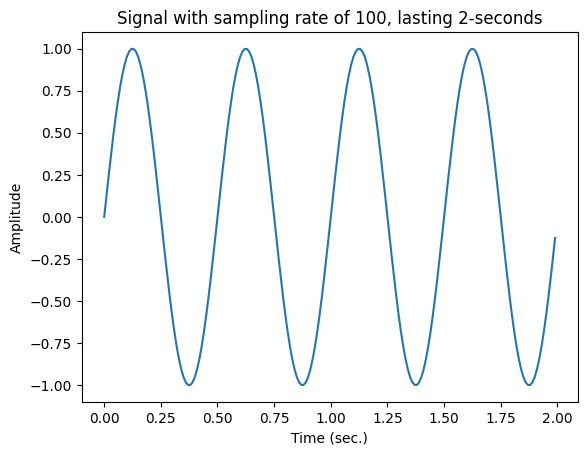

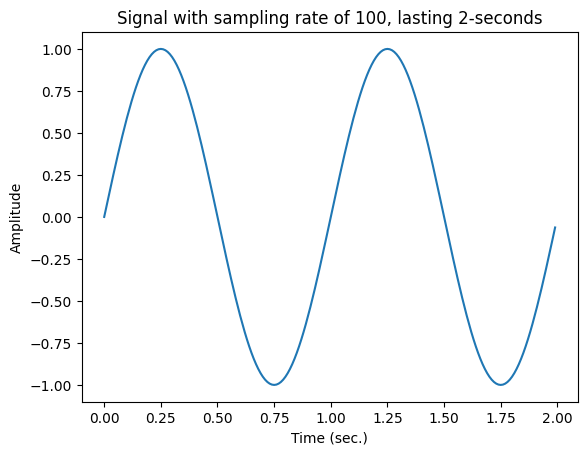

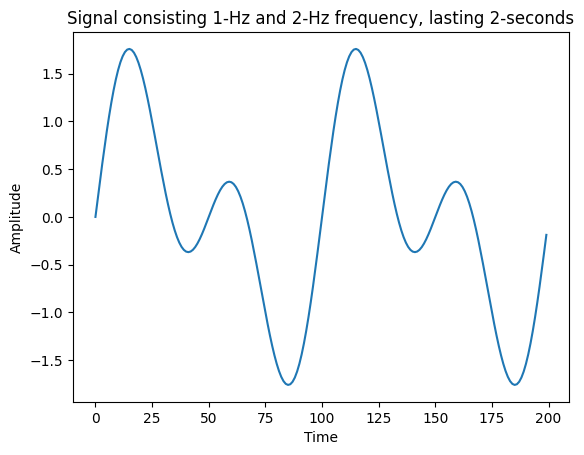

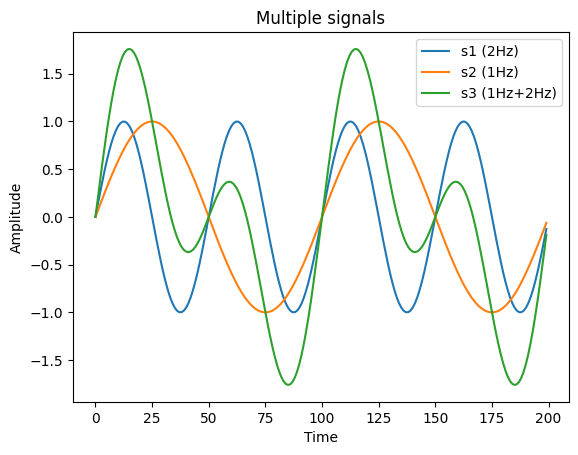

In [21]:
s1=generate_signal(
    length_seconds=2,
    sampling_rate=100,
    frequencies=[2],
    func="sin",
    plot=True
)
s2=generate_signal(
    length_seconds=2,
    sampling_rate=100,
    frequencies=[1],
    func="sin",
    plot=True
)
plt.title('Signal consisting 1-Hz and 2-Hz frequency, lasting 2-seconds')
plt.xlabel('Time')
plt.ylabel('Amplitude')
s3 = s2+s1
plt.plot(s3)
plt.show()


plt.title('Multiple signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(s1, label="s1 (2Hz)")
plt.plot(s2, label="s2 (1Hz)")
plt.plot(s3, label="s3 (1Hz+2Hz)")
plt.legend()
plt.show()

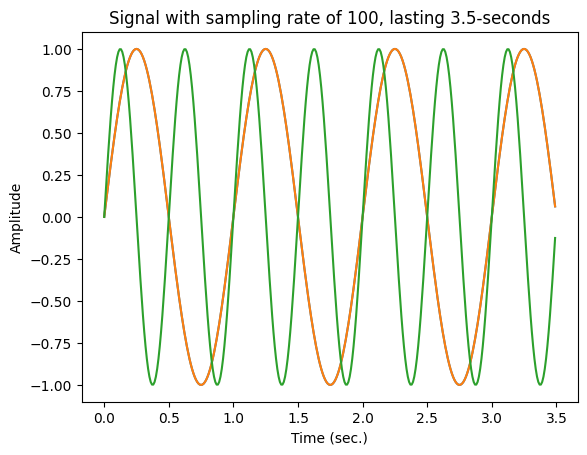

In [6]:

# 3 channels
s = generate_signal(
    length_seconds=3.5,
    sampling_rate=100,
    frequencies=[[1,2],[1],[2]],
    plot=True
)


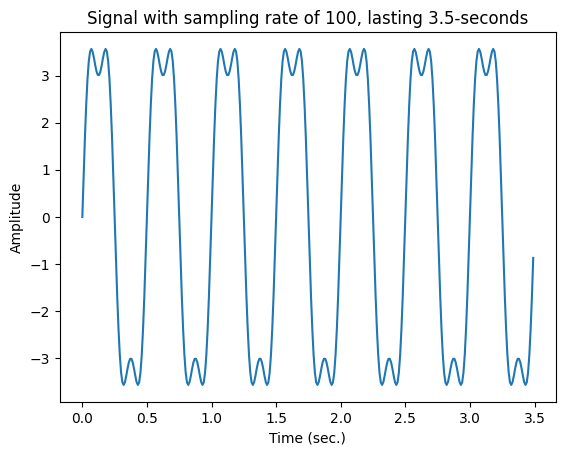

In [7]:

# single channel containing 1hz and 2hz frequencies, where 1hz's amplitude is 1, and 2hz's amplitude is 4
s = generate_signal(
    length_seconds=3.5,
    sampling_rate=100,
    frequencies=[[6,1],[2,4]],
    plot=True,
    include_amplitude=True,
)


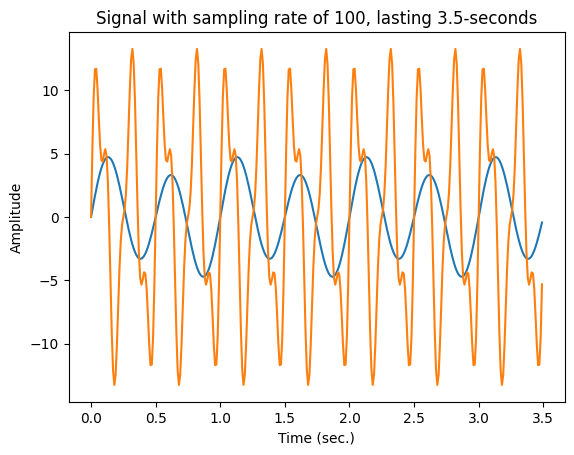

In [8]:

# 2-dim channels. First channel contains 1hz (1 amplitude), and 2hz (4 amplitude). Second channel contains 4hz (10 amplitude), 8hz (1 amplitude) and 10hz (4 amplitude).
s = generate_signal(
    length_seconds=3.5,
    sampling_rate=100,
    frequencies=[ [[1,1],[2,4]], [[4,10],[8,1],[10,4]] ],
    plot=True,
    include_amplitude=True,
)